# QUESTION 2

In [1]:
import numpy as np
import operator as op
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [3]:
X_train[0].shape

(28, 28)

In [4]:
#reshaping from a 28*28 dimension to a 784 dimension
X_train = np.reshape(X_train, (X_train.shape[0], op.mul(X_train.shape[1],X_train.shape[2])))
X_test = np.reshape(X_test, (X_test.shape[0], op.mul(X_test.shape[1],X_test.shape[2])))
X_train.shape

(60000, 784)

In [5]:
X_train[0].shape

(784,)

# PCA

In [6]:
def getPCA(n_components):
    pca = PCA(n_components=n_components)
    X_train_PCA = pca.fit_transform(X_train)
    X_test_PCA = pca.transform(X_test)
    
    return (X_train_PCA,X_test_PCA)

# LDA on Transformed Data

In [7]:
def getLDA(n_components):
    pca = PCA(n_components=n_components)
    X_train_PCA = pca.fit_transform(X_train)
    X_test_PCA = pca.transform(X_test)
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train_PCA, y_train)
    return lda.score(X_test_PCA, y_test)

In [8]:
fifteen = getPCA(15)
print(fifteen[0].shape)

(60000, 15)


In [9]:
getLDA(15)

0.8038

In [10]:
eight = getPCA(8)
print(eight[0].shape)

(60000, 8)


In [11]:
three = getPCA(3)
print(three[0].shape) 

(60000, 3)


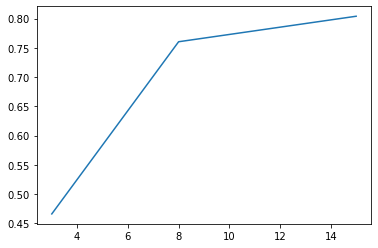

In [12]:
LDAAxis = [15, 8, 3]
LDAScore = [getLDA(15), getLDA(8), getLDA(3)]
plt.plot(LDAAxis, LDAScore)
plt.show()